# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


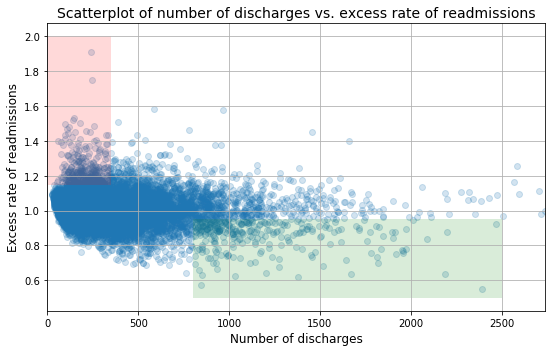

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [5]:
clean_hospital_read_df.head(20)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Answer to A

From the preliminary report, I agree with the initial interpretations from the scatterplot. Particularly, with the observation that the rate of readmissions is trending down with increasing number of discharges. That is not the case with the statistics. Just by glancing to the plot, it will be difficult to do a rough estimate on the the mean or even the percentange of hospital/facilities displaying such excess. If a rough estimate is needed, then another type of graph should be used. Ie. Bar plot.  

From the conclusions presented, it is too early to talk about a significant correlation without calculating the value of such parameter using the appropriate tools. The second conclusion is misleading and at the best a potential guess of the why rather than providing actual call to actions. Then, the regulatory section does not provide any references to potential sources that could validate them.

### EDA 
1. Calculated key parameters for the variables
2. Check the number of hospitals in the data
3. Separate the variables to be analyzed to its own dataframe 
4. Calculate the Correlation Coefficient  


In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [8]:
clean_hospital_read_df['Provider Number'].nunique()


3036

In [9]:
# Group the Number of discharges and Excess Readmission Ration for analysis
de_df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
de_df

,Number of Discharges,Excess Readmission Ratio
16857,0,NaN
14582,0,NaN
15606,0,NaN
15615,0,NaN
14551,0,NaN
15625,0,NaN
15642,0,NaN
15648,0,NaN
15652,0,NaN
15396,0,NaN


In [10]:
# Calculate the parameters to ensure it matches the original table
de_df.describe()

,Number of Discharges,Excess Readmission Ratio
count,11578.000000,11497.000000
mean,362.909397,1.007504
std,309.176945,0.091964
min,0.000000,0.549500
25%,157.000000,0.952600
50%,280.000000,1.003500
75%,472.750000,1.058100
max,6793.000000,1.909500


In [11]:
de_df['Number of Discharges'].nunique()

1294

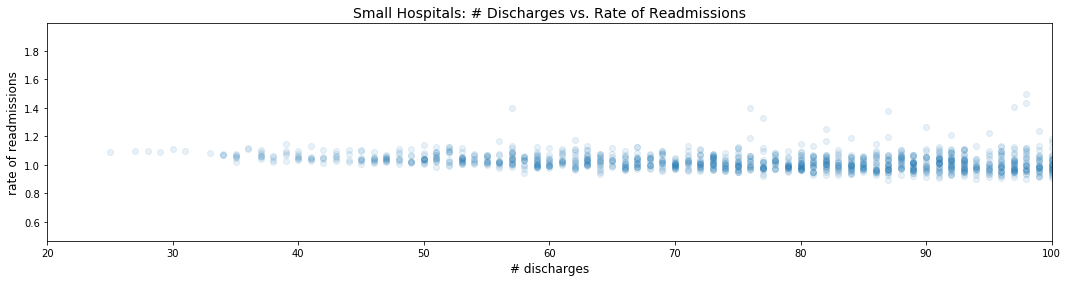

In [40]:
# Using the standard classification for hospital size: Small fewer than < 100 beds
plt.figure(figsize=(18,4))
plt.scatter(x=de_df['Number of Discharges'], y=de_df['Excess Readmission Ratio'], alpha = .1)
plt.xlim(20,100)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
plt.title('Small Hospitals: # Discharges vs. Rate of Readmissions', fontsize=14)

plt.show();

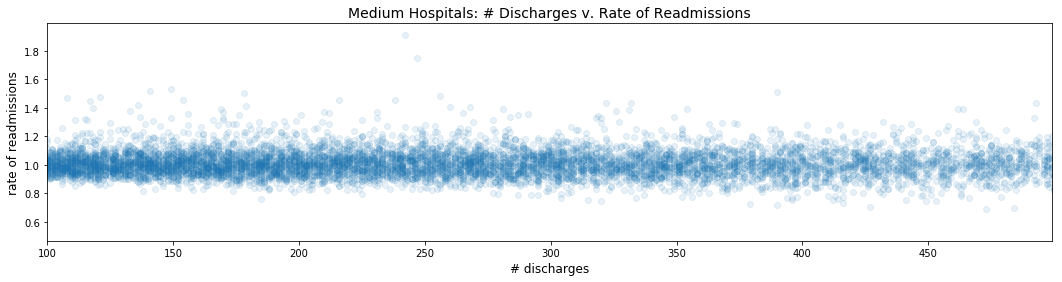

In [17]:
# Using the standard classification for hospital size: 100 < Medium < 499 beds
plt.figure(figsize=(18,4))
plt.scatter(x=de_df['Number of Discharges'], y=de_df['Excess Readmission Ratio'], alpha = .1)
plt.xlim(100,499)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
plt.title('Medium Hospitals: # Discharges v. Rate of Readmissions', fontsize=14)

plt.show();

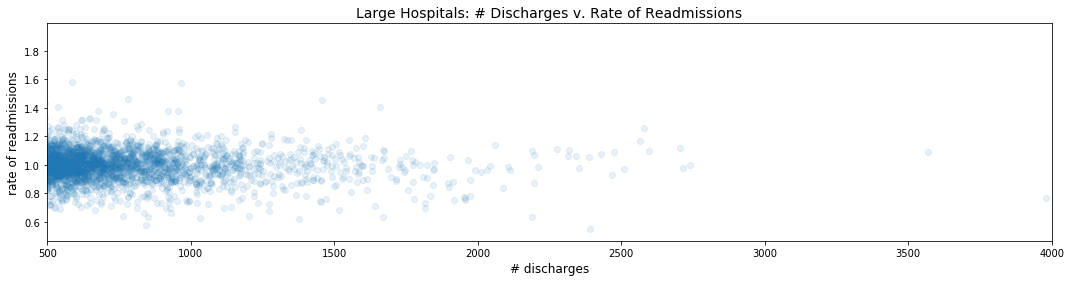

In [18]:
# Using the standard classification for hospital size: Large more than > 500 beds
plt.figure(figsize=(18,4))
plt.scatter(x=de_df['Number of Discharges'], y=de_df['Excess Readmission Ratio'], alpha = .1)
plt.xlim(500,4000)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
plt.title('Large Hospitals: # Discharges v. Rate of Readmissions', fontsize=14)

plt.show();

In [12]:
# Correlation calculation 
corr_de = de_df.corr(method='pearson')
print(corr_de)

                          Number of Discharges  Excess Readmission Ratio
Number of Discharges                  1.000000                 -0.097398
Excess Readmission Ratio             -0.097398                  1.000000


### Setup an appropriate hypothesis test

For the purposes of our analysis and given that we were able to calculate the correlation coefficient by using Pearson's r.  
H0: r = 0 ( No correlation between the number of discharges and the readmission rate)
Ha: r ≠ 0

In [36]:
# Find corresponding values to perform Hypothesis testing with Pearson's r and alpha =.01
size = len(de_df)
df = size - 2 #degress of freedom
r_value = -.097398

#Using the Pearson's correlation table 
p_test = .036417

r_test = p_test < 0
print('P test result:{}'.format(p_test))

P test result:0.036417


#### Analysis
The result from using the Hypothesis testing shoes that we reject the null hypothesis that there is no correlation between hospital size and readmission rate. The calculated correlation coefficient is -0.097, so there exists a slight negative correlation; meaning that for every 100 people that get discharged, only 9 will get to be readmitted. 

Caveat: Another important discovery from the data analysis is that from additional research, it seems that the discharged observations were also included to come with the information needed to calculate the Excessive ratio. This indicates that variables are not independent. Usually, the requirement to study the correlation of variables is independence. 

### Statistical v Practical Significance

There are some situations that even having results with statistical significance are not sufficient if they are not able to provide some practical guidance. That is when the empirical knowledge that has been accumulated over years of experience come in handy and reaching out the client SME is needed so you can gauge the call of actions that you need to recommend and understand the trade-offs.


### Scatter Plots

In this situation, the plot helped to roughly estimate if there was some kind of correlation, and where the clusters are being formed. However, the plot could have been better used if instead of plotting a calculated ratio, the actual data was provided for the plot. It will have been better to plot the Ratio variable by itself. To plot the same information in a more direct manner, I will plot the number of discharges and readmissions.  


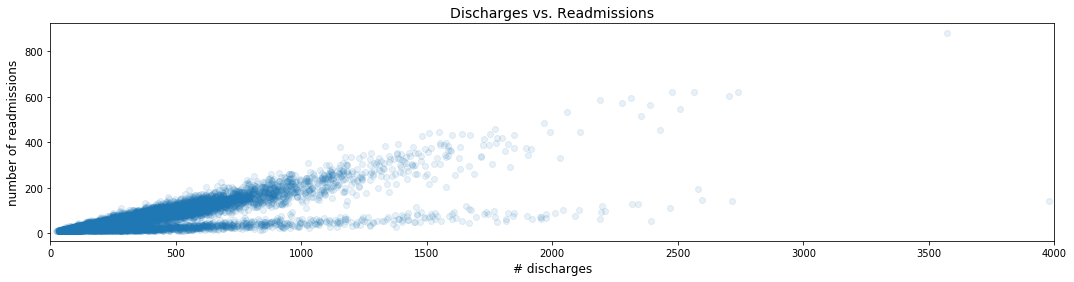

In [39]:

plt.figure(figsize=(18,4))
plt.scatter(x=clean_hospital_read_df['Number of Discharges'], y=clean_hospital_read_df['Number of Readmissions'], alpha = .1)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('number of readmissions', fontsize=12)
plt.title('Discharges vs. Readmissions', fontsize=14)
plt.xlim(0,4000)
plt.show();

In [41]:
dr = clean_hospital_read_df[['Number of Discharges','Number of Readmissions']]

In [42]:
codr = dr.corr(method='pearson')
print(codr)

                        Number of Discharges  Number of Readmissions
Number of Discharges                1.000000                0.791272
Number of Readmissions              0.791272                1.000000
